# ARMA Model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

series = pd.read_csv('Canada.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
series = series.asfreq(pd.infer_freq(series.index))
series.columns = series.columns.str.replace(' ', '_')
series = series.iloc[:, 1]

In [2]:
from statsmodels.tsa.arima_model import ARMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARMA(history, order=(2,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

Test MSE: 32731.110


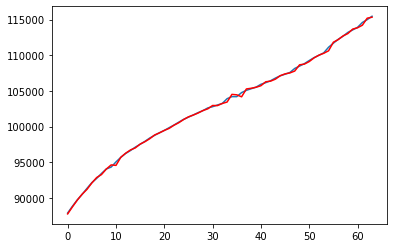

In [3]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()